In [1]:
url='http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

In [2]:
import pandas as pd
import numpy as np

In [3]:
column_names=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','hd']

In [4]:
df=pd.read_csv(url,header=None,names=column_names)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  hd        303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [6]:
filt=(df['ca']=='?')
df.loc[filt,'ca']=np.nan
filt=(df['thal']=='?')
df.loc[filt,'thal']=np.nan

In [7]:
filt0=(df['sex']==0)
filt1=(df['sex']==1)
df.loc[filt0,'sex']='F'
df.loc[filt1,'sex']='M'

C:\Users\Rahul\AppData\Local\Temp\ipykernel_16988\440346460.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'F' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[filt0,'sex']='F'


In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,M,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,M,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,M,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,M,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,F,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [9]:
df['ca']=df['ca'].astype(float)
df['thal']=df['thal'].astype(float)

In [10]:
# Convert column once before the loop
df['hd'] = df['hd'].astype('object')

# Loop with safe assignment
for i in df.index:
    if df.loc[i, 'hd'] == 0:
        df.loc[i, 'hd'] = 'Healthy'
    else:
        df.loc[i, 'hd'] = 'Unhealthy'


In [11]:
df['sex']=df['sex'].astype('category')
df['cp']=df['cp'].astype('category')
df['fbs']=df['fbs'].astype('category')
df['restecg']=df['restecg'].astype('category')
df['exang']=df['exang'].astype('category')
df['slope']=df['slope'].astype('category')
df['ca']=df['ca'].astype('category')
df['thal']=df['thal'].astype('category')
df['hd']=df['hd'].astype('category')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    float64 
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  303 non-null    float64 
 4   chol      303 non-null    float64 
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalach   303 non-null    float64 
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    category
 11  ca        299 non-null    category
 12  thal      301 non-null    category
 13  hd        303 non-null    category
dtypes: category(9), float64(5)
memory usage: 15.9 KB


In [13]:
filt=(df['ca'].isna() | df['thal'].isna())
df.loc[filt]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,F,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,NaN,Healthy
166,52.0,M,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,NaN,3.0,Healthy
192,43.0,M,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,NaN,7.0,Unhealthy
266,52.0,M,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,NaN,Unhealthy
287,58.0,M,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,Healthy
302,38.0,M,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,Healthy


In [14]:
df.dropna(axis=0,how='any',inplace=True)

In [15]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
hd          0
dtype: int64

In [16]:
df.groupby('sex')['hd'].value_counts()

C:\Users\Rahul\AppData\Local\Temp\ipykernel_16988\1572591687.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')['hd'].value_counts()


sex  hd       
F    Healthy       71
     Unhealthy     25
M    Unhealthy    112
     Healthy       89
Name: count, dtype: int64

In [17]:
df.groupby('cp')['hd'].value_counts()

C:\Users\Rahul\AppData\Local\Temp\ipykernel_16988\34088813.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('cp')['hd'].value_counts()


cp   hd       
1.0  Healthy       16
     Unhealthy      7
2.0  Healthy       40
     Unhealthy      9
3.0  Healthy       65
     Unhealthy     18
4.0  Unhealthy    103
     Healthy       39
Name: count, dtype: int64

In [18]:
df.groupby('hd')['fbs'].value_counts()

C:\Users\Rahul\AppData\Local\Temp\ipykernel_16988\1410278361.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('hd')['fbs'].value_counts()


hd         fbs
Healthy    0.0    137
           1.0     23
Unhealthy  0.0    117
           1.0     20
Name: count, dtype: int64

In [19]:
df.groupby('restecg')['hd'].value_counts()

C:\Users\Rahul\AppData\Local\Temp\ipykernel_16988\1868842805.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('restecg')['hd'].value_counts()


restecg  hd       
0.0      Healthy      92
         Unhealthy    55
1.0      Unhealthy     3
         Healthy       1
2.0      Unhealthy    79
         Healthy      67
Name: count, dtype: int64

In [20]:
df.groupby('slope')['hd'].value_counts()

C:\Users\Rahul\AppData\Local\Temp\ipykernel_16988\2435272020.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('slope')['hd'].value_counts()


slope  hd       
1.0    Healthy      103
       Unhealthy     36
2.0    Unhealthy     89
       Healthy       48
3.0    Unhealthy     12
       Healthy        9
Name: count, dtype: int64

In [21]:
df.groupby('ca')['hd'].value_counts()

C:\Users\Rahul\AppData\Local\Temp\ipykernel_16988\3803636439.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('ca')['hd'].value_counts()


ca   hd       
0.0  Healthy      129
     Unhealthy     45
1.0  Unhealthy     44
     Healthy       21
2.0  Unhealthy     31
     Healthy        7
3.0  Unhealthy     17
     Healthy        3
Name: count, dtype: int64

In [22]:
df.groupby('thal')['hd'].value_counts()

C:\Users\Rahul\AppData\Local\Temp\ipykernel_16988\3930405387.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('thal')['hd'].value_counts()


thal  hd       
3.0   Healthy      127
      Unhealthy     37
6.0   Unhealthy     12
      Healthy        6
7.0   Unhealthy     88
      Healthy       27
Name: count, dtype: int64

### predicting HeartDisease ony with the gender of each patient

In [23]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [24]:
# Encode categorical variables
le_sex = LabelEncoder()
le_hd = LabelEncoder()

X = le_sex.fit_transform(df['sex'])  # Feature encoding
y = le_hd.fit_transform(df['hd'])    # Target encoding

X = sm.add_constant(X)  # Add constant for intercept

# Fit logistic regression
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [25]:
print('intercept',model.intercept_)
print('coefficient',model.coef_)
print('score',model.score)

intercept [-0.98849862]
coefficient [[0.00685129 1.18748078]]
score <bound method ClassifierMixin.score of LogisticRegression()>


# Heart Disease=0.00219802+1.175391128*sex

### Feamle(sex=0)   hd=0,00219802
### Male(sex=1)    hd~1.1753

# These are log(odds)

# All Variable predicting heart disease

In [26]:
le_sex = LabelEncoder()
df['sex'] = le_sex.fit_transform(df['sex'])
X = df.drop(['hd'], axis=1)
y =  pd.get_dummies(df['hd'], drop_first=True)  
X = X.apply(pd.to_numeric, errors='coerce')
X = sm.add_constant(X)
model = sm.Logit(y, X)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.344594
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Unhealthy   No. Observations:                  297
Model:                          Logit   Df Residuals:                      283
Method:                           MLE   Df Model:                           13
Date:                Tue, 06 May 2025   Pseudo R-squ.:                  0.5007
Time:                        14:08:06   Log-Likelihood:                -102.34
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 1.136e-36
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.3720      2.879     -2.560      0.010     -13.016      -1.728
age           -0.0142      0.

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
# Predict probabilities and classify as 0 or 1
pred_probs = result.predict(X)
predicted_hd = [1 if p > 0.5 else 0 for p in pred_probs]

# Optional: Add predictions to your DataFrame
df['predicted_hd'] = predicted_hd


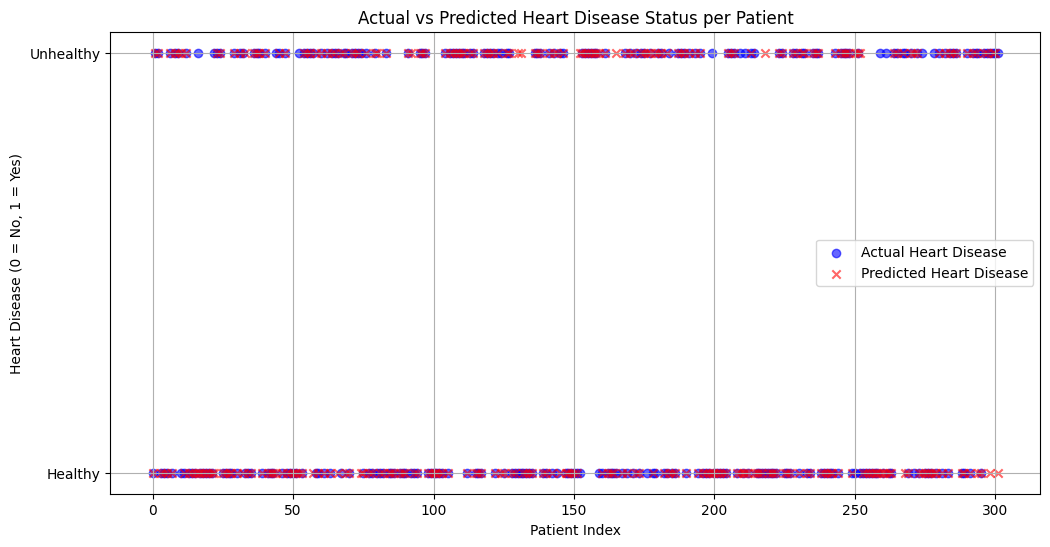

In [29]:

plt.figure(figsize=(12, 6))

# Actual values
plt.scatter(df.index, df['hd'], color='blue', label='Actual Heart Disease', alpha=0.6)

# Predicted values
plt.scatter(df.index, df['predicted_hd'], color='red', marker='x', label='Predicted Heart Disease', alpha=0.6)

plt.title('Actual vs Predicted Heart Disease Status per Patient')
plt.xlabel('Patient Index')
plt.ylabel('Heart Disease (0 = No, 1 = Yes)')
plt.legend()
plt.grid(True)
plt.show()


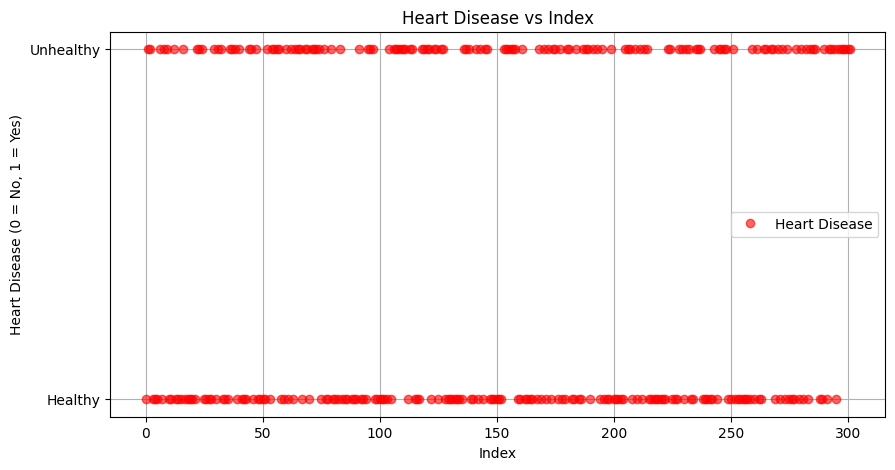

In [30]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'hd' is the heart disease column (0 or 1)
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['hd'], marker='o', linestyle='', color='red', alpha=0.6, label='Heart Disease')

plt.title('Heart Disease vs Index')
plt.xlabel('Index')
plt.ylabel('Heart Disease (0 = No, 1 = Yes)')
plt.legend()
plt.grid(True)
plt.show()


In [31]:
df['hd_dummy']=pd.get_dummies(df['hd'],drop_first=True).astype('int')

In [32]:
df['predicted_hd']

0      0
1      1
2      1
3      0
4      0
      ..
297    1
298    0
299    1
300    1
301    0
Name: predicted_hd, Length: 297, dtype: int64

In [33]:
predicted_df=df[['hd_dummy','predicted_hd']]

In [34]:
predicted_df

,hd_dummy,predicted_hd
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
297,1,1
298,1,0
299,1,1
300,1,1


In [37]:
predicted_df=predicted_df.sort_values(ascending=True,by=['predicted_hd'])
predicted_df.reset_index(inplace=True)
predicted_df.drop(labels=['index'],axis=1,inplace=True)
predicted_df = predicted_df.sort_values(by='predicted_hd', ascending=True)
predicted_df['rank'] = range(1, len(predicted_df) + 1)

In [38]:
predicted_df

,hd_dummy,predicted_hd,rank
0,1,0,1
1,0,0,2
2,0,0,3
3,0,0,4
4,0,0,5
...,...,...,...
265,1,1,293
168,1,1,294
167,1,1,295
166,1,1,296


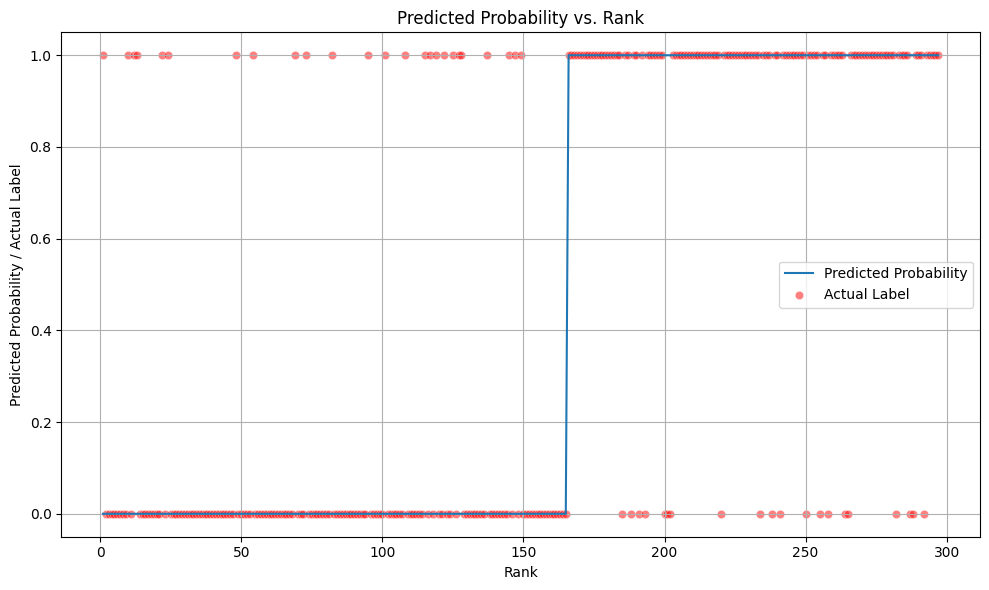

In [40]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=predicted_df, x='rank', y='predicted_hd', label='Predicted Probability')
sns.scatterplot(data=predicted_df, x='rank', y='hd_dummy', color='red', label='Actual Label', alpha=0.5)
plt.title("Predicted Probability vs. Rank")
plt.xlabel("Rank")
plt.ylabel("Predicted Probability / Actual Label")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


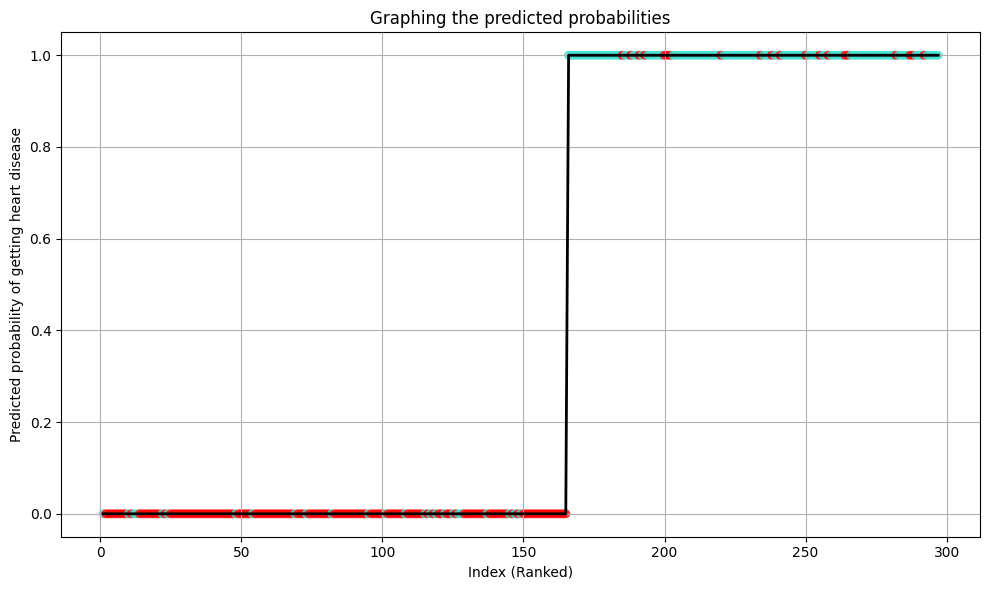

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(predicted_df['rank'], predicted_df['predicted_hd'], color='black', linewidth=2)
plt.scatter(predicted_df['rank'], predicted_df['predicted_hd'], 
            c=predicted_df['hd_dummy'].map({0: 'red', 1: 'turquoise'}), 
            alpha=0.7, s=30)

plt.xlabel('Index (Ranked)')
plt.ylabel('Predicted probability of getting heart disease')
plt.title('Graphing the predicted probabilities')
plt.grid(True)
plt.tight_layout()
plt.show()
